In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from algorithms.algorithms.one_plus_one_cma import OnePlusOneCMAES
import ioh 

import importlib.util

# The path to the lumapi.py file
file_path = 'C:\\Program Files\\Lumerical\\v241\\api\\python\\lumapi.py'
spec_win = importlib.util.spec_from_file_location('lumapi', file_path)
lumapi = importlib.util.module_from_spec(spec_win)
spec_win.loader.exec_module(lumapi)

import scipy.io
import os

In [29]:

def immersed_grating_fdtd_index_plot(params, polarization, wavelength_i, polarization_angle, mesh_accuracy, run_switch=0):
    fdtd = lumapi.FDTD(hide=True)

    fdtd.switchtolayout
    fdtd.deleteall
    #etch slab from y=0.4 to y=0.6
    #coating slab from y=0 to y=0.4 #0.4 mircrons coating width
    #gratings at y=0
    #immersion slab from y=0 to y=-0.8
    # all slabs are 1 period + some "extra" in width 

    period = 2.07e-6
    incidence_angle = 62.6
    #polarization_angle = 45
    #wavelength_i = 2.345e-6

    #addstructuregroup();
    # Add and configure the "alGrating" structure group
    fdtd.addstructuregroup()
    fdtd.set("name", "alGrating")
    fdtd.set("enabled", 1)

    fdtd.addstructuregroup()
    fdtd.set("name", "coatingSlab")
    fdtd.set("enabled", 1)

    fdtd.addstructuregroup()
    fdtd.set("name", "etchSlab")
    fdtd.set("enabled", 1)

    fdtd.addstructuregroup()
    fdtd.set("name", "immersionSlab")
    fdtd.set("enabled", 1)

    widths_x, widths_z, H = params[:5], params[5:10], params[-1] 

    ################################### Al gratings ###################################
  
    #widths_x, widths_z, H = params[:5], params[5:10], params[-1] 

    material = "Al (Aluminium) - Palik"

    period = 2.07e-6
    
    centers_z = np.array([0.5, 1.5, 2.5, 3.5, 4.5])*(period/5)
    centers_x = np.array([0.5, 1.5, 2.5, 3.5, 4.5])*(period/5)



    # Loop over widths in x-dimension
    for xi in range(len(widths_x)):
        center_x = centers_x[xi]
        width_x = widths_x[xi]
        
        # Loop over widths in z-dimension
        for zi in range(len(widths_z)):
            center_z = centers_z[zi]
            width_z = widths_z[xi]

            #print(f"{width_x} - {width_z}")
            
            # Create a rectangular pillar
            fdtd.addrect()
            fdtd.set('x', center_x)  # Center position in x
            fdtd.set('x span', width_x)  # Width in x-dimension
            fdtd.set('y', -H / 2)  # Base position in y
            fdtd.set('y span', H)  # Height in y-dimension
            fdtd.set('z', center_z)  # Center position in z
            fdtd.set('z span', width_z)  # Width in z-dimension
            
            fdtd.set('material', material)  # Set the material
            fdtd.set('name', f'grating_x{xi+1}_z{zi+1}')  # Unique name for each rectangle
            fdtd.addtogroup("alGrating")  # Add to the group


    ################################### Coating slab ###################################
    coating_material = "Al (Aluminium) - Palik"
    offset = period * 0.2  # 20% of the period

    ymin = 0
    ymax = 0.4e-6  # 0.4 microns coating width

    slabs_width = period + offset
    slabs_center = period / 2

    # Add a rectangle and set properties
    fdtd.addrect()
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", ymin)  # Base position in y
    fdtd.set("y max", ymax)  # Height in y-dimension
    fdtd.set("z", slabs_center)  # Center position in z
    fdtd.set("z span", slabs_width)  # Width in z-dimension
    fdtd.set("material", coating_material)  # Set the material
    fdtd.set("name", "coatingSlab")
    fdtd.addtogroup("coatingSlab")  # Add to the group


    ################################### Etch slab ###################################
    coating_material = "etch"  # Assuming "etch" is a placeholder for the actual material name
    offset = period * 0.2  # 20% of the period

    ymin = 0.4e-6  # Start of etch slab in y-direction
    ymax = 0.6e-6  # End of etch slab in y-direction

    slabs_width = period + offset  # Width of the slab including offset
    slabs_center = period / 2  # Center position of the slab

    # Add a rectangle for the etch slab
    fdtd.addrect()
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", ymin)  # Base position in y
    fdtd.set("y max", ymax)  # Height in y-dimension
    fdtd.set("z", slabs_center)  # Center position in z
    fdtd.set("z span", slabs_width)  # Width in z-dimension
    fdtd.set("material", coating_material)  # Set the material
    fdtd.set("name", "etchSlab")
    fdtd.addtogroup("etchSlab")  # Add to the group

    ################################### Immersion slab ###################################
    immersion_material = "Si (Silicon) - Palik"  # Silicon material from Palik's database
    offset = period * 0.2  # 20% of the period

    ymin = -0.8e-6  # Start of immersion slab in y-direction
    ymax = 0.0  # End of immersion slab in y-direction

    slabs_width = period + offset  # Width of the slab including offset
    slabs_center = period / 2  # Center position of the slab

    # Add a rectangle for the immersion slab
    fdtd.addrect()
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", ymin)  # Base position in y
    fdtd.set("y max", ymax)  # Height in y-dimension
    fdtd.set("z", slabs_center)  # Center position in z
    fdtd.set("z span", slabs_width)  # Width in z-dimension

    # Mesh settings
    fdtd.set("override mesh order from material database", 1)
    fdtd.set("mesh order", 3)  # Set the mesh order explicitly

    # Set the material and other properties
    fdtd.set("material", immersion_material)  # Set the material
    fdtd.set("name", "immersionSlab")
    fdtd.addtogroup("immersionSlab")  # Add to the group


    ################################### index monitor ###################################
    '''offset = period * 0.05  # 5% of the period
    ymin = -0.75e-6  # Start of index monitor region in y-direction
    ymax = 0.5e-6  # End of index monitor region in y-direction

    slabs_width = period + offset  # Width of the index monitor including offset
    slabs_center = period / 2  # Center position of the index monitor

    # Add an index monitor
    fdtd.addindex()
    fdtd.set("monitor type", 3)  # 2D z-normal monitor type
    fdtd.set("monitor type", '2D y-normal')  # 3D
    # Set properties for the index monitor
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", -0.1e-6)  # Base position in y
    fdtd.set("y max", -0.1e-6)  # Height in y-dimension
    fdtd.set("z", slabs_center)  # Center position in z
    fdtd.set("z span", slabs_width)  # Width in z-dimension, commented out as in original script

    # Further monitor settings
    fdtd.set("name", "index_monitor")'''


        ################################### index monitor ###################################
    offset = period * 0.05  # 5% of the period
    ymin = -0.75e-6  # Start of index monitor region in y-direction
    ymax = 0.5e-6  # End of index monitor region in y-direction

    slabs_width = period + offset  # Width of the index monitor including offset
    slabs_center = period / 2  # Center position of the index monitor

    # Add an index monitor
    fdtd.addindex()

    # Set properties for the index monitor
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", ymin)  # Base position in y
    fdtd.set("y max", ymax)  # Height in y-dimension
    fdtd.set("z", slabs_center / 5)  # Center position in z
    # fdtd.set("z span", slabs_width)  # Width in z-dimension, commented out as in original script
    # Further monitor settings
    fdtd.set("name", "index_monitor_xy")
    fdtd.set("monitor type", 3)  # 2D z-normal monitor type

    # Add an index monitor
    fdtd.addindex()
    fdtd.set("simulation type", '3D')  # 3D
    fdtd.set("monitor type", '2D Y-normal')  # 2D z-normal monitor type
    # Set properties for the index monitor
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("z", slabs_center)  # Base position in y
    fdtd.set("z span", slabs_width)  # Height in y-dimension
    fdtd.set("y min", -0.1e-6)  # Center position in z
    fdtd.set("y max", -0.1e-6)  # Center position in z
    # Further monitor settings
    fdtd.set("name", "index_monitor_xz")


    # Add an index monitor
    fdtd.addindex()

    fdtd.set("simulation type", '3D')  # 3D
    fdtd.set("monitor type", '2D X-normal')  # 2D z-normal monitor type

    # Set properties for the index monitor
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("z", slabs_center)  # Base position in y
    fdtd.set("z span", slabs_width)  # Height in y-dimension
    fdtd.set("y min", -0.1e-6)  # Center position in z
    fdtd.set("y max", -0.1e-6)  # Center position in z


    # Further monitor settings
    fdtd.set("name", "index_monitor_yz")



    ################################### FDTD ###################################
    ymin = -0.75e-6; ymax = 0.5e-6; #immersion slab from y=0 to y=-0.8

    slabs_width = period
    slabs_center = slabs_width/2

    fdtd.addfdtd()
    fdtd.set("dimension", '3D')  # 3D
    fdtd.set('x',slabs_center)  # Center position in x
    fdtd.set('x span', slabs_width)  # Width in x-dimension

    fdtd.set('y min', ymin)  # Base position in y
    fdtd.set('y max',ymax)  # Height in y-dimension

    fdtd.set('y', 0);  # Center position in z
    fdtd.set('y span', slabs_width)  # Width in z-dimension

    fdtd.set('z', slabs_center);  # Center position in z
    fdtd.set('z span', slabs_width)  # Width in z-dimension

    fdtd.set('x min bc', 'Bloch')
    fdtd.set('z min bc', 'Bloch')

    fdtd.set("mesh accuracy", mesh_accuracy)  # Set the mesh order explicitly #2, 15, 50, 120, 240, 460 mins


    ################################### Source ###################################
    fdtd.addplane()
    fdtd.set('injection axis', 'y')
    fdtd.set('x', period / 2)
    y_source = ymin * 0.90
    fdtd.set('y', y_source)
    fdtd.set('z', period / 5 / 2)
    fdtd.set('angle theta', incidence_angle)
    fdtd.set('angle phi', 90)
    if polarization == "U":
        fdtd.set('polarization angle', polarization_angle)
    else:
        fdtd.set("polarization definition", polarization)
    fdtd.set('plane wave type', 'Bloch/periodic')
    fdtd.set('wavelength start', wavelength_i)
    fdtd.set('wavelength stop', wavelength_i)

    ################################### reflection monitor ###################################
    offset = period * 0.5  # Additional offset
    slabs_width = period + offset
    slabs_center = period / 2

    fdtd.addpower()
    fdtd.set("name", "reflection_grating")
    fdtd.set("monitor type", "3D")
    fdtd.set('x', slabs_center)
    fdtd.set('x span', slabs_width)
    y_monitor = ymin * 0.95
    fdtd.set('y', y_monitor)
    fdtd.set('y min', y_monitor)
    fdtd.set('y max', y_monitor)
    fdtd.set('z', slabs_center / 5)
    fdtd.set('z span', slabs_width / 5)


    filename = '2dDesign_field' +  f"{polarization}" + f"{wavelength_i*1e6}" + ".fsp"
    filename = "visualization.fsp"
    # Run the simulation
    fdtd.save(filename)
    #index_profile = fdtd.getresult("index_monitor","index")
    index_profile_xy = fdtd.getresult("index_monitor_xy","index preview")
    index_profile_xz = fdtd.getresult("index_monitor_xz","index preview")
    index_monitor_yz = fdtd.getresult("index_monitor_yz","index preview")
        
    # Run the simulation

    if run_switch == 1:
        fdtd.run()
        Tr = fdtd.transmission("reflection_grating", 1)
        
        mname = "reflection_grating"  # monitor name
        G = fdtd.grating(mname)  # power to each order (fraction of transmitted power)
        n_orders = fdtd.gratingn(mname)  # power to each order (fraction of transmitted power)
        m_orders = fdtd.gratingm(mname)  # power to each order (fraction of transmitted power)
        u1_vectors = fdtd.gratingu1(mname)
        u2_vectors = fdtd.gratingu1(mname)
        return n_orders, m_orders, u1_vectors, u2_vectors, np.array(-Tr * G), index_profile_xy, index_profile_xz, index_monitor_yz
    else:
        return np.zeros([1,2]),np.zeros([1,2]), np.zeros([1,2]),  np.zeros([1,2]), np.zeros([1,2]), index_profile_xy, index_profile_xz, index_monitor_yz



In [30]:

def immersed_grating_fdtd(params, polarization, wavelength_i, polarization_angle, mesh_accuracy, run_switch=1):
    fdtd = lumapi.FDTD(hide=True)

    fdtd.switchtolayout
    fdtd.deleteall
    #etch slab from y=0.4 to y=0.6
    #coating slab from y=0 to y=0.4 #0.4 mircrons coating width
    #gratings at y=0
    #immersion slab from y=0 to y=-0.8
    # all slabs are 1 period + some "extra" in width 

    period = 2.07e-6
    incidence_angle = 62.6
    #polarization_angle = 45
    #wavelength_i = 2.345e-6

    #addstructuregroup();
    # Add and configure the "alGrating" structure group
    fdtd.addstructuregroup()
    fdtd.set("name", "alGrating")
    fdtd.set("enabled", 1)

    fdtd.addstructuregroup()
    fdtd.set("name", "coatingSlab")
    fdtd.set("enabled", 1)

    fdtd.addstructuregroup()
    fdtd.set("name", "etchSlab")
    fdtd.set("enabled", 1)

    fdtd.addstructuregroup()
    fdtd.set("name", "immersionSlab")
    fdtd.set("enabled", 1)

    widths_x, widths_z, H = params[:5], params[5:10], params[-1] 

    ################################### Al gratings ###################################
  
    #widths_x, widths_z, H = params[:5], params[5:10], params[-1] 

    material = "Al (Aluminium) - Palik"

    period = 2.07e-6
    
    centers_z = np.array([0.5, 1.5, 2.5, 3.5, 4.5])*(period/5)
    centers_x = np.array([0.5, 1.5, 2.5, 3.5, 4.5])*(period/5)



    # Loop over widths in x-dimension
    for xi in range(len(widths_x)):
        center_x = centers_x[xi]
        width_x = widths_x[xi]
        
        # Loop over widths in z-dimension
        for zi in range(len(widths_z)):
            center_z = centers_z[zi]
            width_z = widths_z[xi]

            #print(f"{width_x} - {width_z}")
            
            # Create a rectangular pillar
            fdtd.addrect()
            fdtd.set('x', center_x)  # Center position in x
            fdtd.set('x span', width_x)  # Width in x-dimension
            fdtd.set('y', -H / 2)  # Base position in y
            fdtd.set('y span', H)  # Height in y-dimension
            fdtd.set('z', center_z)  # Center position in z
            fdtd.set('z span', width_z)  # Width in z-dimension
            
            fdtd.set('material', material)  # Set the material
            fdtd.set('name', f'grating_x{xi+1}_z{zi+1}')  # Unique name for each rectangle
            fdtd.addtogroup("alGrating")  # Add to the group


    ################################### Coating slab ###################################
    coating_material = "Al (Aluminium) - Palik"
    offset = period * 0.2  # 20% of the period

    ymin = 0
    ymax = 0.4e-6  # 0.4 microns coating width

    slabs_width = period + offset
    slabs_center = period / 2

    # Add a rectangle and set properties
    fdtd.addrect()
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", ymin)  # Base position in y
    fdtd.set("y max", ymax)  # Height in y-dimension
    fdtd.set("z", slabs_center)  # Center position in z
    fdtd.set("z span", slabs_width)  # Width in z-dimension
    fdtd.set("material", coating_material)  # Set the material
    fdtd.set("name", "coatingSlab")
    fdtd.addtogroup("coatingSlab")  # Add to the group


    ################################### Etch slab ###################################
    coating_material = "etch"  # Assuming "etch" is a placeholder for the actual material name
    offset = period * 0.2  # 20% of the period

    ymin = 0.4e-6  # Start of etch slab in y-direction
    ymax = 0.6e-6  # End of etch slab in y-direction

    slabs_width = period + offset  # Width of the slab including offset
    slabs_center = period / 2  # Center position of the slab

    # Add a rectangle for the etch slab
    fdtd.addrect()
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", ymin)  # Base position in y
    fdtd.set("y max", ymax)  # Height in y-dimension
    fdtd.set("z", slabs_center)  # Center position in z
    fdtd.set("z span", slabs_width)  # Width in z-dimension
    fdtd.set("material", coating_material)  # Set the material
    fdtd.set("name", "etchSlab")
    fdtd.addtogroup("etchSlab")  # Add to the group

    ################################### Immersion slab ###################################
    immersion_material = "Si (Silicon) - Palik"  # Silicon material from Palik's database
    offset = period * 0.2  # 20% of the period

    ymin = -0.8e-6  # Start of immersion slab in y-direction
    ymax = 0.0  # End of immersion slab in y-direction

    slabs_width = period + offset  # Width of the slab including offset
    slabs_center = period / 2  # Center position of the slab

    # Add a rectangle for the immersion slab
    fdtd.addrect()
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", ymin)  # Base position in y
    fdtd.set("y max", ymax)  # Height in y-dimension
    fdtd.set("z", slabs_center)  # Center position in z
    fdtd.set("z span", slabs_width)  # Width in z-dimension

    # Mesh settings
    fdtd.set("override mesh order from material database", 1)
    fdtd.set("mesh order", 3)  # Set the mesh order explicitly

    # Set the material and other properties
    fdtd.set("material", immersion_material)  # Set the material
    fdtd.set("name", "immersionSlab")
    fdtd.addtogroup("immersionSlab")  # Add to the group


    ################################### index monitor ###################################
    offset = period * 0.05  # 5% of the period
    ymin = -0.75e-6  # Start of index monitor region in y-direction
    ymax = 0.5e-6  # End of index monitor region in y-direction

    slabs_width = period + offset  # Width of the index monitor including offset
    slabs_center = period / 2  # Center position of the index monitor

    # Add an index monitor
    fdtd.addindex()

    # Set properties for the index monitor
    fdtd.set("x", slabs_center)  # Center position in x
    fdtd.set("x span", slabs_width)  # Width in x-dimension
    fdtd.set("y min", ymin)  # Base position in y
    fdtd.set("y max", ymax)  # Height in y-dimension
    fdtd.set("z", slabs_center / 5)  # Center position in z
    # fdtd.set("z span", slabs_width)  # Width in z-dimension, commented out as in original script

    # Further monitor settings
    fdtd.set("name", "index_monitor")
    fdtd.set("monitor type", 3)  # 2D z-normal monitor type



    ################################### FDTD ###################################
    ymin = -0.75e-6; ymax = 0.5e-6; #immersion slab from y=0 to y=-0.8

    slabs_width = period
    slabs_center = slabs_width/2

    fdtd.addfdtd()
    fdtd.set("dimension", '3D')  # 3D
    fdtd.set('x',slabs_center)  # Center position in x
    fdtd.set('x span', slabs_width)  # Width in x-dimension

    fdtd.set('y min', ymin)  # Base position in y
    fdtd.set('y max',ymax)  # Height in y-dimension

    fdtd.set('z', slabs_center/5);  # Center position in z
    fdtd.set('z span', slabs_width/5)  # Width in z-dimension

    fdtd.set('x min bc', 'Bloch')
    fdtd.set('z min bc', 'Bloch')

    fdtd.set("mesh accuracy", mesh_accuracy)  # Set the mesh order explicitly #2, 15, 50, 120, 240, 460 mins


    ################################### Source ###################################
    fdtd.addplane()
    fdtd.set('injection axis', 'y')
    fdtd.set('x', period / 2)
    y_source = ymin * 0.90
    fdtd.set('y', y_source)
    fdtd.set('z', period / 5 / 2)
    fdtd.set('angle theta', incidence_angle)
    fdtd.set('angle phi', 90)
    if polarization == "U":
        fdtd.set('polarization angle', polarization_angle)
    else:
        fdtd.set("polarization definition", polarization)
    fdtd.set('plane wave type', 'Bloch/periodic')
    fdtd.set('wavelength start', wavelength_i)
    fdtd.set('wavelength stop', wavelength_i)

    ################################### reflection monitor ###################################
    offset = period * 0.5  # Additional offset
    slabs_width = period + offset
    slabs_center = period / 2

    fdtd.addpower()
    fdtd.set("name", "reflection_grating")
    fdtd.set("monitor type", "3D")
    fdtd.set('x', slabs_center)
    fdtd.set('x span', slabs_width)
    y_monitor = ymin * 0.95
    fdtd.set('y', y_monitor)
    fdtd.set('y min', y_monitor)
    fdtd.set('y max', y_monitor)
    fdtd.set('z', slabs_center / 5)
    fdtd.set('z span', slabs_width / 5)


    filename = '2dDesign_field' +  f"{polarization}" + f"{wavelength_i*1e6}" + ".fsp"
    # Run the simulation
    fdtd.save(filename)
    index_profile = fdtd.getresult("index_monitor","index")
        
    # Run the simulation

    if run_switch == 1:
        fdtd.run()
        Tr = fdtd.transmission("reflection_grating", 1)
        
        mname = "reflection_grating"  # monitor name
        G = fdtd.grating(mname)  # power to each order (fraction of transmitted power)
        n_orders = fdtd.gratingn(mname)  # power to each order (fraction of transmitted power)
        m_orders = fdtd.gratingm(mname)  # power to each order (fraction of transmitted power)
        u1_vectors = fdtd.gratingu1(mname)
        u2_vectors = fdtd.gratingu1(mname)
        return n_orders, m_orders, u1_vectors, u2_vectors, np.array(-Tr * G), index_profile
    else:
        return np.zeros([1,2]),np.zeros([1,2]), np.zeros([1,2]),  np.zeros([1,2]), np.zeros([1,2]), index_profile



In [32]:
#######   CMA-ES analysis ########

filename = 'CMA_ES_run_result.txt'

raw_y = []
matrix = []

with open(filename, 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if not line:
            continue
        data = line.split()
        if len(data) == 13:
            raw_y.append(float(data[1]))
            row = [float(val) for val in data[2:]]
            matrix.append(row)

eff_array = np.array(raw_y)*-1
params_norm_mat = np.array(matrix)

params_mat = []

for i in range(len(params_norm_mat)):
    params_norm = params_norm_mat[i]
    widths_x_norm, widths_z_norm, H_norm = params_norm[:5], params_norm[5:10], params_norm[-1] 

    period = 2.07e-6
    widths_x = (widths_x_norm + 1) * (period/5.1 / 2)
    widths_z = (widths_z_norm + 1) * (period/5.1 / 2)
    H = (H_norm + 1) * (0.6e-6 - 0.2e-6) / 2 + 0.2e-6

    params = np.concatenate([widths_x, widths_z, [H]])
    params_mat.append(params)

params_mat = np.array(params_mat)
eff_array = eff_array

best_params_mat = params_mat[np.where(eff_array >= 0.802)[0][0]]

best_params_mat

array([1.63539741e-07, 1.79211062e-07, 1.52327850e-07, 2.08341644e-07,
       1.77976368e-07, 2.09259547e-07, 1.71454447e-07, 2.11643294e-07,
       1.74291159e-07, 1.85095341e-07, 2.00000000e-07])

<>:53: SyntaxWarning: invalid escape sequence '\P'
<>:53: SyntaxWarning: invalid escape sequence '\P'
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\4188722470.py:53: SyntaxWarning: invalid escape sequence '\P'
  '''plt.savefig('dof_FOM_evol.png', dpi=1000)


"plt.savefig('dof_FOM_evol.png', dpi=1000)\n\n# Save to remote path\nsave_path = r'\tsclient\\PHIGS\\paper'\nos.makedirs(save_path, exist_ok=True)\nplt.savefig(os.path.join(save_path, 'dof_FOM_evol.png'), dpi=1000)"

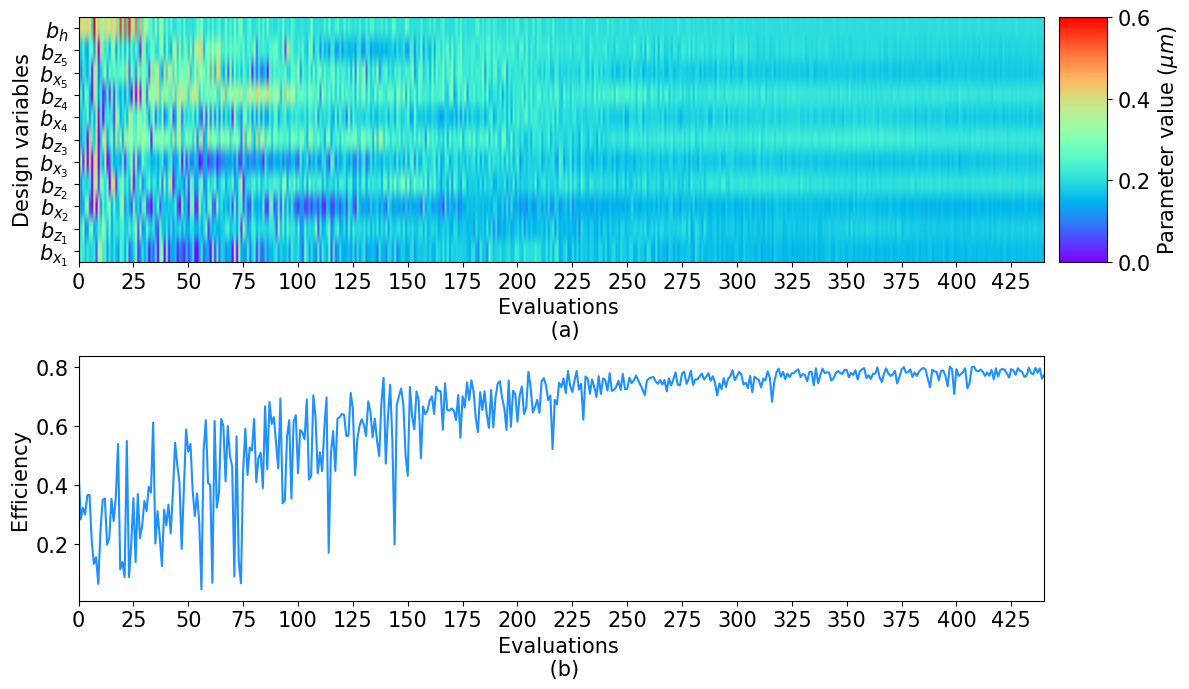

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import MaxNLocator

# Assuming 'eff_array' and 'params_mat' are your data arrays
font_size = 20  # Example font size

# Create figure with 2 rows and 2 columns (right column for colorbar)
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(2, 2, width_ratios=[20, 1], height_ratios=[1, 1])

# Updated x-labels for degrees of freedom
x_labels = [
    r"$b_{x_1}$", r"$b_{z_1}$", r"$b_{x_2}$", r"$b_{z_2}$",
    r"$b_{x_3}$", r"$b_{z_3}$", r"$b_{x_4}$", r"$b_{z_4}$",
    r"$b_{x_5}$", r"$b_{z_5}$", r"$b_{h}$"
]

# --- Top plot (heatmap) ---
ax = fig.add_subplot(gs[0, 0])
im = ax.imshow(params_mat.T * 1e6, aspect='auto', origin='lower', cmap='rainbow')
ax.set_ylabel('Design variables', fontsize=font_size * 0.75)
ax.set_xlabel('Evaluations \n (a)', fontsize=font_size * 0.75)

# y-ticks for DoFs
ax.set_yticks(range(len(x_labels)))
ax.set_yticklabels(x_labels, fontsize=font_size * 0.75)

# --- Bottom plot (efficiency), share x with top ---
ax_bottom = fig.add_subplot(gs[1, 0], sharex=ax)
ax_bottom.plot(range(len(eff_array)), eff_array, color='dodgerblue')
ax_bottom.set_xlabel('Evaluations \n (b)', fontsize=font_size * 0.75)
ax_bottom.set_ylabel('Efficiency', fontsize=font_size * 0.75)
ax_bottom.xaxis.set_major_locator(MaxNLocator(integer=True))
ax_bottom.set_xlim([0, len(eff_array)-1])
ax_bottom.tick_params(axis='both', labelsize=font_size * 0.75)

# --- Re-enable top x-ticks & labels (since sharex hides them) ---
ax.tick_params(axis='x', labelbottom=True)
ax.set_xticks(np.arange(0, len(eff_array), 25))  # consistent ticks
ax.tick_params(axis='both', labelsize=font_size * 0.75)

# --- Colorbar in its own axis ---
cax = fig.add_subplot(gs[0, 1])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'Parameter value ($\mu m$)', fontsize=font_size * 0.75)
cbar.ax.tick_params(labelsize=font_size * 0.75)

plt.tight_layout()

# Save locally
'''plt.savefig('dof_FOM_evol.png', dpi=1000)

# Save to remote path
save_path = r'\tsclient\PHIGS\paper'
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, 'dof_FOM_evol.png'), dpi=1000)'''

In [34]:
best_params_mat = params_mat[np.where(eff_array >= 0.802)[0][0]]

best_params_mat


array([1.63539741e-07, 1.79211062e-07, 1.52327850e-07, 2.08341644e-07,
       1.77976368e-07, 2.09259547e-07, 1.71454447e-07, 2.11643294e-07,
       1.74291159e-07, 1.85095341e-07, 2.00000000e-07])

In [35]:
#######   CMA-ES bes point at different polarization ########

In [36]:
_, _, _, _, _, profile_xy, profile_xz, profile_yz = immersed_grating_fdtd_index_plot(best_params_mat, 'U', 2.304e-6, 45, 4, 0)

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:64: SyntaxWarning: invalid escape sequence '\P'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:64: SyntaxWarning: invalid escape sequence '\P'
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\3151551931.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('X ($\mu m$)\n (a)', fontsize=font_size * 0.75)
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\3151551931.py:43: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('X ($\mu m$)\n (b)', fontsize=font_size * 0.75)
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\3151551931.py:64: SyntaxWarning: invalid escape sequence '\P'
  '''plt.savefig('refractiveIndex_2.png', dpi = 700)


"plt.savefig('refractiveIndex_2.png', dpi = 700)\n\nsave_path = r'\tsclient\\PHIGS\\paper'\nos.makedirs(save_path, exist_ok=True) \nplt.savefig(os.path.join(save_path, 'refractiveIndex_2.png'), dpi=700)"

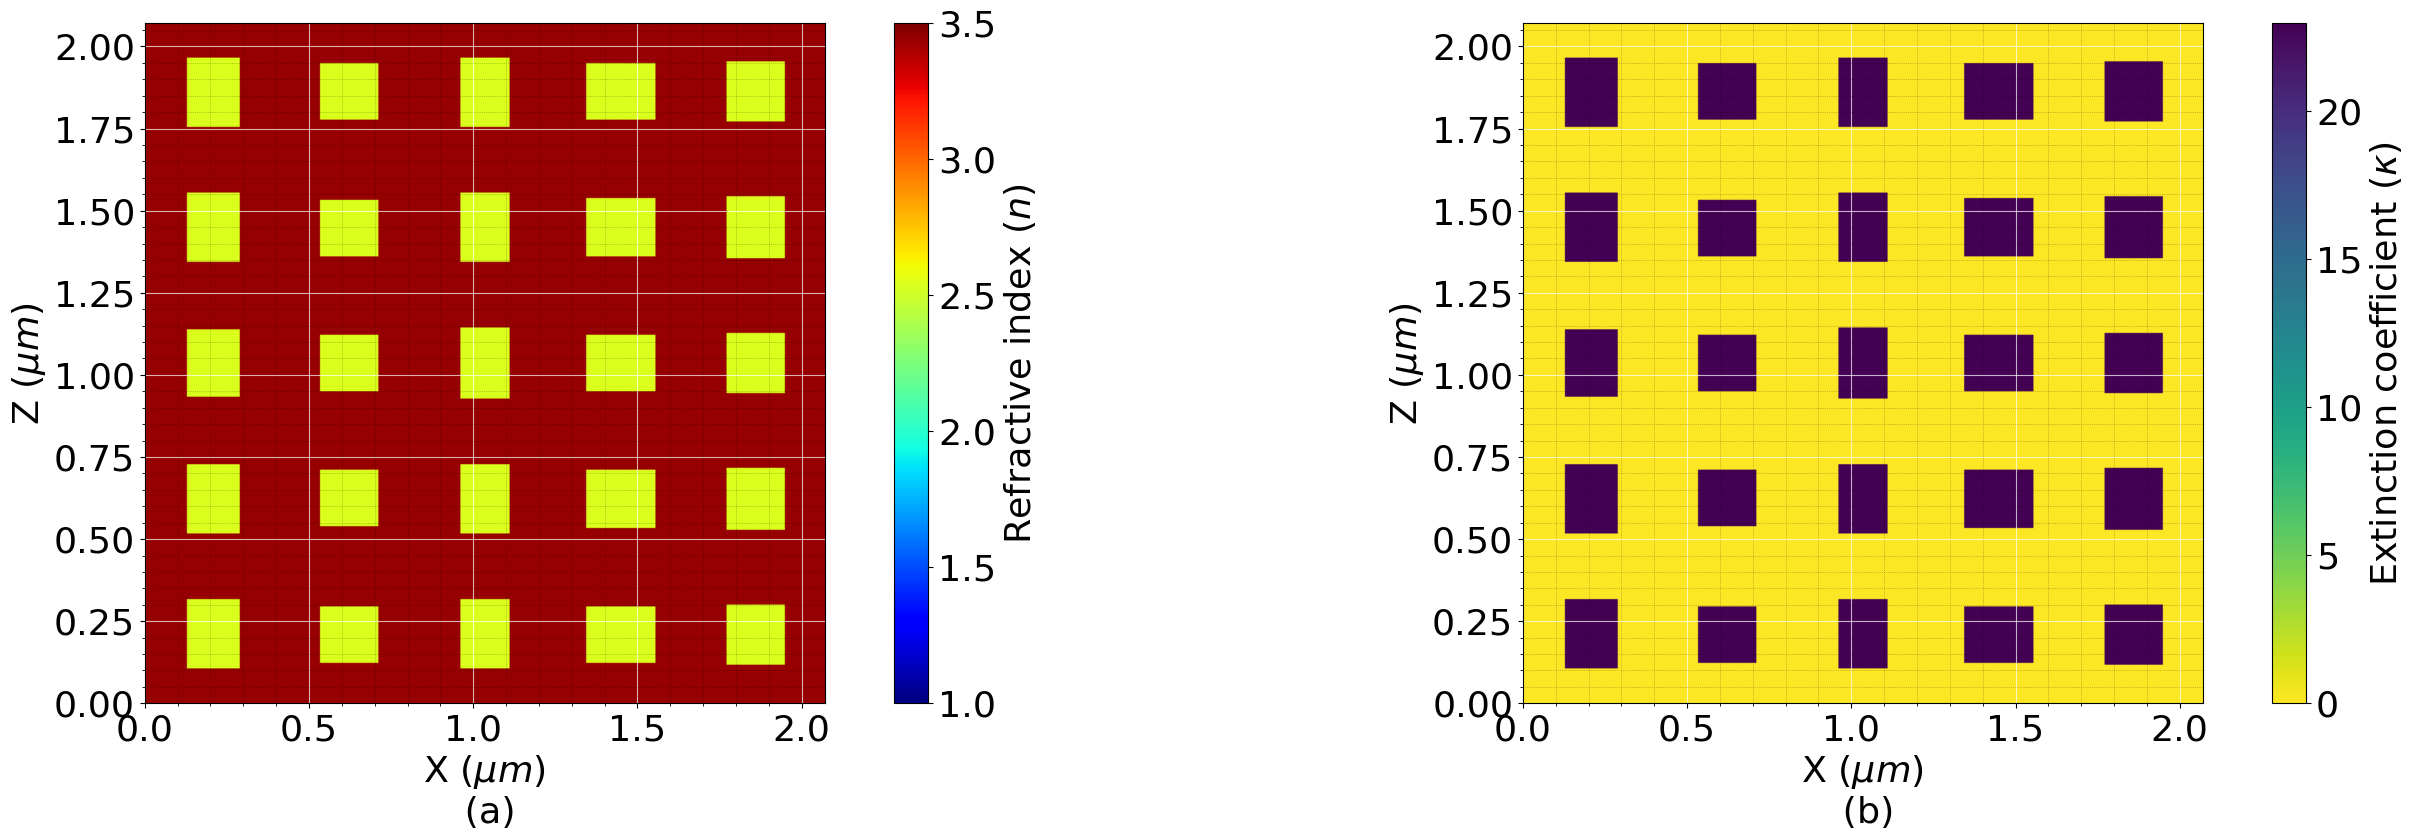

In [37]:
index_z_real = profile_xz['index_y'][:, 0, :, 0].real  # Assuming we are plotting the real part of index_z
index_z_imag = profile_xz['index_y'][:, 0, :, 0].imag  # Assuming we are plotting the real part of index_z
x = profile_xz['x'].flatten()
y = profile_xz['z'].flatten()

#plt.figure(figsize=(7*2, 7.5))
plt.figure(figsize=(7*2*2, 8.5))
font_size = 35
X, Y = np.meshgrid(x*1e6, y*1e6)

plt.subplot(1, 2, 1)
imshow1 = plt.imshow(index_z_real.T, extent=[x.min() * 1e6, x.max() * 1e6, y.min() * 1e6, y.max() * 1e6], 
                     origin = 'lower', aspect='equal', cmap='jet',
                     vmin = 1, vmax = 3.5)
cbar1 = plt.colorbar(imshow1, label='Refractive index')
cbar1.ax.tick_params(labelsize=font_size * 0.75)
cbar1.set_label('Refractive index ($n$)', fontsize=font_size * 0.75)

plt.xlabel('X ($\mu m$)\n (a)', fontsize=font_size * 0.75)
plt.ylabel(r'Z ($\mu m$)', fontsize=font_size * 0.75)

plt.grid(True)

plt.tick_params(axis='y', labelsize=font_size * 0.75)
plt.tick_params(axis='x', labelsize=font_size * 0.75)

# Enable minor ticks on both x and y axes
plt.minorticks_on()
# Add minor grid
# Customize major gridlines
plt.grid(True, which='major', linestyle='-', linewidth='0.8', color='white', alpha=0.7)

# Turn on minor ticks and customize minor gridlines
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='k', alpha=0.4)

plt.subplot(1, 2, 2)
imshow2 = plt.imshow(index_z_imag.T, extent=[x.min() * 1e6, x.max() * 1e6, y.min() * 1e6, y.max() * 1e6], origin = 'lower', aspect='equal', cmap='viridis_r')
cbar2 = plt.colorbar(imshow2, label='Extinction coefficient')
cbar2.ax.tick_params(labelsize=font_size * 0.75)
cbar2.set_label(r'Extinction coefficient ($\kappa$)', fontsize=font_size * 0.75)

plt.xlabel('X ($\mu m$)\n (b)', fontsize=font_size * 0.75)
plt.ylabel(r'Z ($\mu m$)', fontsize=font_size * 0.75)

plt.grid(True)

plt.tick_params(axis='y', labelsize=font_size * 0.75)
plt.tick_params(axis='x', labelsize=font_size * 0.75)

# Enable minor ticks on both x and y axes
plt.minorticks_on()
# Add minor grid
# Customize major gridlines
plt.grid(True, which='major', linestyle='-', linewidth='0.8', color='white', alpha=0.7)

# Turn on minor ticks and customize minor gridlines
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='k', alpha=0.4)
# Show the plot

plt.tight_layout()

'''plt.savefig('refractiveIndex_2.png', dpi = 700)

save_path = r'\tsclient\PHIGS\paper'
os.makedirs(save_path, exist_ok=True) 
plt.savefig(os.path.join(save_path, 'refractiveIndex_2.png'), dpi=700)'''

In [38]:
####### comparison with sawtooth and PSO optimized binary #######

In [39]:
sawtooth_data = np.load('sawtooth_grating_data_opRange.npz', allow_pickle=True)

In [40]:
results = np.load('cmaes_results.npz', allow_pickle=True)
eff_array = np.array(results["efficiency"])

u1_arr_cmaes = np.array(results["u1_vectors"])
u2_arr_cmaes = np.array(results["u2_vectors"])

np.shape(eff_array)

s_pol_arr_eff = eff_array[:,0,0][::3]
u_pol_arr_eff = eff_array[:,0,0][2::3]
p_pol_arr_eff = eff_array[:,0,0][1::3]

wavelength_arr = np.linspace(2.304e-6, 2.400e-6, 7)


Sawtooth - S - 0.659
Sawtooth - P - 0.581
Sawtooth - D - 0.620
Meta - S - 0.802
Meta - P - 0.758
Meta - U - 0.7801


<>:106: SyntaxWarning: invalid escape sequence '\P'
<>:106: SyntaxWarning: invalid escape sequence '\P'
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\2803130308.py:106: SyntaxWarning: invalid escape sequence '\P'
  '''plt.savefig('effvsWl_swir3_m5.png', dpi=1000)


"plt.savefig('effvsWl_swir3_m5.png', dpi=1000)\nsave_path = r'\tsclient\\PHIGS\\paper'\nos.makedirs(save_path, exist_ok=True) \nplt.savefig(os.path.join(save_path, 'effvsWl_swir3_m5.png'), dpi=1000)"

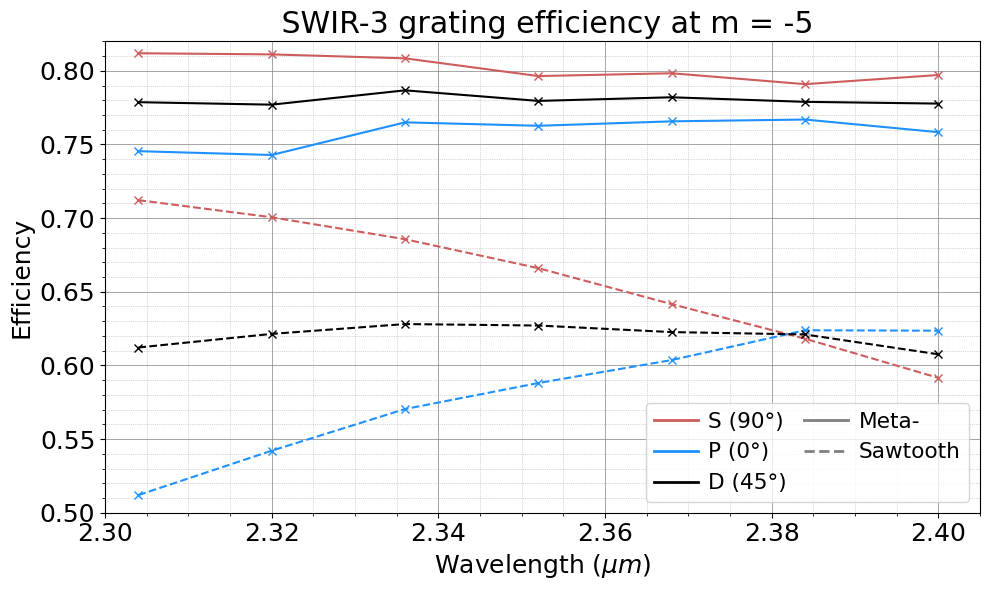

In [42]:

import matplotlib.pyplot as plt
import numpy as np

# Convert wavelength to micrometers for easier reading on the plot
wavelength_microns = wavelength_arr * 1e6
sawtooth_wavelength_microns = sawtooth_data['wavelength_range'] * 1e6

# Apply wavelength filter: only include wavelengths between 2.3 and 2.4 µm
low_limit = 2.18
upper_limit = 2.55
low_limit = 2.3
upper_limit = 2.4

wavelength_filter = (low_limit <= wavelength_microns) & (wavelength_microns <= upper_limit)
filtered_wavelengths = wavelength_microns[wavelength_filter]

sawtooth_wavelength_filter = (low_limit <= sawtooth_wavelength_microns) & (sawtooth_wavelength_microns <= upper_limit)
sawtooth_filtered_wavelengths = sawtooth_wavelength_microns[sawtooth_wavelength_filter]

# Define colors for each polarization
colors = ['indianred', 'dodgerblue', 'k']
labels = ['S', 'P', 'D']
polarization_keys = ['eff_arr_90', 'eff_arr_0', 'eff_arr_45']  # Keys for sawtooth data


font_size = 24
# Start the plot
plt.figure(figsize=(10, 6))
# Loop through each polarization for "binary" data
for i, label in enumerate(labels):
    # Extract the -5th order efficiency for filtered wavelengths 
    sawtooth_neg_5th_order_eff = [
        sawtooth_data[polarization_keys[i]][wl][0]
        for wl in range(len(sawtooth_data['wavelength_range'])) if sawtooth_wavelength_filter[wl]
    ]

    # Plot both "binary" and "sawtooth" for this polarization
    plt.plot(sawtooth_filtered_wavelengths, sawtooth_neg_5th_order_eff, color=colors[i], linestyle='--', marker='x', label=f'Sawtooth: {label}', alpha = 1)
    print(f"Sawtooth - {label} - {np.mean(sawtooth_neg_5th_order_eff):0.3f}")
    

# Customize the plot
lowerlimit_plot = 2.30
upperlimit_plot = 2.405

'''plt.plot(wv_arr, unpol_eff,  linestyle='-', marker='o', color = 'k', label = 'Binary (wl cmaes opt) - U')
plt.plot(wv_arr, s_eff,  linestyle='-', marker='o', color = 'indianred', label = 'Binary (wl cmaes opt) - S (90°)')
plt.plot(wv_arr, p_eff,  linestyle='-', marker='o', color = 'dodgerblue', label = 'Binary (wl cmaes opt) - P (0°)')'''

plt.plot(wavelength_arr*1e6, s_pol_arr_eff,  linestyle='-', marker='x', color = 'indianred', label = 'Meta-: S')
plt.plot(wavelength_arr*1e6, p_pol_arr_eff,  linestyle='-', marker='x', color = 'dodgerblue', label = 'Meta-: P')
plt.plot(wavelength_arr*1e6, u_pol_arr_eff,  linestyle='-', marker='x', color = 'k', label = 'Meta-: D')

print(f"Meta - S - {np.mean(s_pol_arr_eff):0.3f}")
print(f"Meta - P - {np.mean(p_pol_arr_eff):0.3f}")
print(f"Meta - U - {np.mean(u_pol_arr_eff):0.4f}")


plt.xlim(lowerlimit_plot, upperlimit_plot)
plt.xlabel(r'Wavelength ($\mu m$)', fontsize = font_size * 0.75)
plt.ylabel('Efficiency', fontsize = font_size * 0.75)
plt.title(r' SWIR-3 grating efficiency at m = -5', fontsize = font_size * 0.9)

plt.legend(fontsize=font_size * 0.45, loc='lower right')
plt.grid(True)

plt.tick_params(axis='y', labelsize= font_size * 0.75)
plt.tick_params(axis='x', labelsize= font_size * 0.75)

# Enable minor ticks on both x and y axes
plt.minorticks_on()
# Add minor grid
# Customize major gridlines
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='grey')

# Turn on minor ticks and customize minor gridlines
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5')

plt.ylim(0.5, 0.82)
# Show the plot
#plt.savefig('effvsWl_compar.png', dpi=1000)
#plt.savefig('effvsWl_swir3.png', dpi=1000)
from matplotlib.lines import Line2D

# Define custom legend handles
custom_lines = [Line2D([0], [0], color='indianred', linestyle='-', lw=2, label='S (90°)'),
    Line2D([0], [0], color='dodgerblue', linestyle='-', lw=2, label='P (0°)'),
    Line2D([0], [0], color='k', linestyle='-', lw=2, label='D (45°)'),    
    Line2D([0], [0], color='grey', linestyle='-', lw=2, label='Meta-'),
    Line2D([0], [0], color='grey', linestyle='--', lw=2, label='Sawtooth')
]


plt.legend(
    handles=custom_lines,
    fontsize=font_size * 0.65,
    loc='lower right',
    ncol=2,
    columnspacing=0.8,
    handletextpad=0.5
)


plt.tight_layout()
'''plt.savefig('effvsWl_swir3_m5.png', dpi=1000)
save_path = r'\tsclient\PHIGS\paper'
os.makedirs(save_path, exist_ok=True) 
plt.savefig(os.path.join(save_path, 'effvsWl_swir3_m5.png'), dpi=1000)'''

In [43]:
# polarization sensitivity:

sawtooth_TE =  np.array([
        sawtooth_data[polarization_keys[0]][wl][0]
        for wl in range(len(sawtooth_data['wavelength_range'])) if sawtooth_wavelength_filter[wl]
    ])

sawtooth_TM =  np.array([
        sawtooth_data[polarization_keys[1]][wl][0]
        for wl in range(len(sawtooth_data['wavelength_range'])) if sawtooth_wavelength_filter[wl]
    ])

sawtooth_UP = np.array([
        sawtooth_data[polarization_keys[2]][wl][0]
        for wl in range(len(sawtooth_data['wavelength_range'])) if sawtooth_wavelength_filter[wl]
    ])

sawtooth_pol_sens =(sawtooth_TE - sawtooth_TM) / (sawtooth_TE + sawtooth_TM)
binary_pol_sens_cmaes = (s_pol_arr_eff - p_pol_arr_eff) / (s_pol_arr_eff + p_pol_arr_eff)


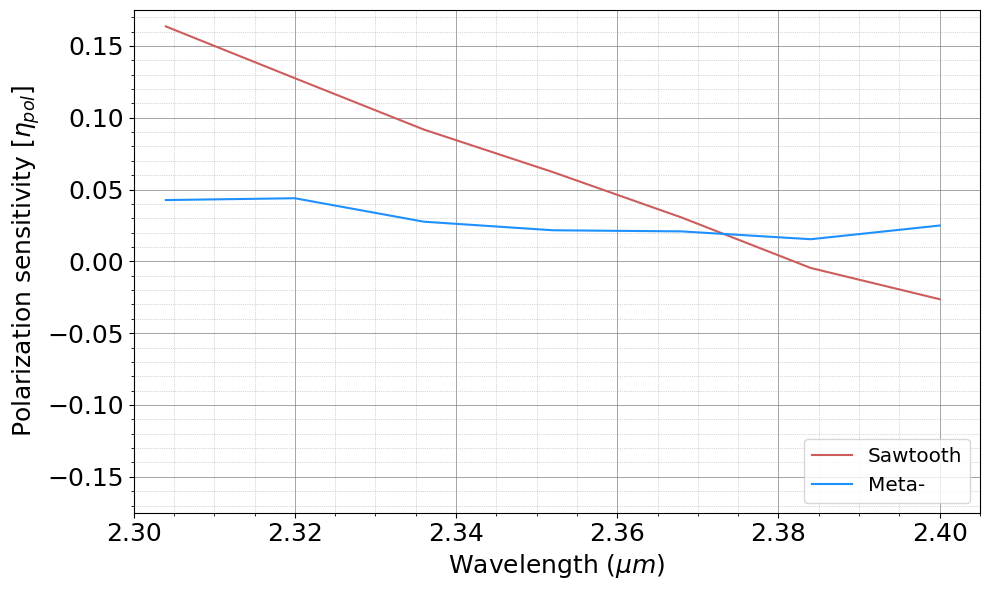

In [44]:



plt.figure(figsize=(10, 6))
plt.plot(sawtooth_filtered_wavelengths, sawtooth_pol_sens, label = 'Sawtooth', ls = '-', color = 'indianred')
plt.plot(wavelength_arr*1e6, binary_pol_sens_cmaes,  label = 'Meta-', ls = '-', color = 'dodgerblue')

plt.ylim(-0.175, 0.175)
'''plt.axhline(-0.15, ls = '--', color = 'k')
plt.axhline(0.15, ls = '--', color = 'k')
plt.legend()'''
plt.xlim(lowerlimit_plot, upperlimit_plot)


plt.xlabel(r'Wavelength ($\mu m$)', fontsize = font_size * 0.75)
plt.ylabel(r'Polarization sensitivity [$\eta_{pol}$]', fontsize = font_size * 0.75)

plt.legend(loc = 'lower right' ,fontsize = font_size * 0.6)
plt.grid(True)

plt.tick_params(axis='y', labelsize= font_size * 0.75)
plt.tick_params(axis='x', labelsize= font_size * 0.75)

# Enable minor ticks on both x and y axes
plt.minorticks_on()
# Add minor grid
# Customize major gridlines
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='grey')

# Turn on minor ticks and customize minor gridlines
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5')
plt.tight_layout()

#plt.savefig('polSenVswl_swir3_m5.png', dpi=1000)

#save_path = r'\tsclient\PHIGS\paper'
#os.makedirs(save_path, exist_ok=True) 
#lt.savefig(os.path.join(save_path, 'polSenVswl_swir3_m5.png'), dpi=1000)

In [45]:
#### dispersion ####

In [46]:
results = np.load('cmaes_results.npz', allow_pickle=True)
eff_array = np.array(results["efficiency"])

u1_arr_cmaes = np.array(results["u1_vectors"])
u2_arr_cmaes = np.array(results["u2_vectors"])




<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:85: SyntaxWarning: invalid escape sequence '\c'
<>:104: SyntaxWarning: invalid escape sequence '\P'
<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:85: SyntaxWarning: invalid escape sequence '\c'
<>:104: SyntaxWarning: invalid escape sequence '\P'
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\3421206350.py:51: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_xlabel(f'Diffraction angle ($^\circ$) \n (b)', fontsize=font_size * 0.75)
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\3421206350.py:85: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_xlabel(f'Diffraction angle ($^\circ$) \n (a)', fontsize=font_size * 0.75)
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\3421206350.py:104: SyntaxWarning: invalid escape sequence '\P'
  save_path = "\\tsclient\PHIGS\paper"


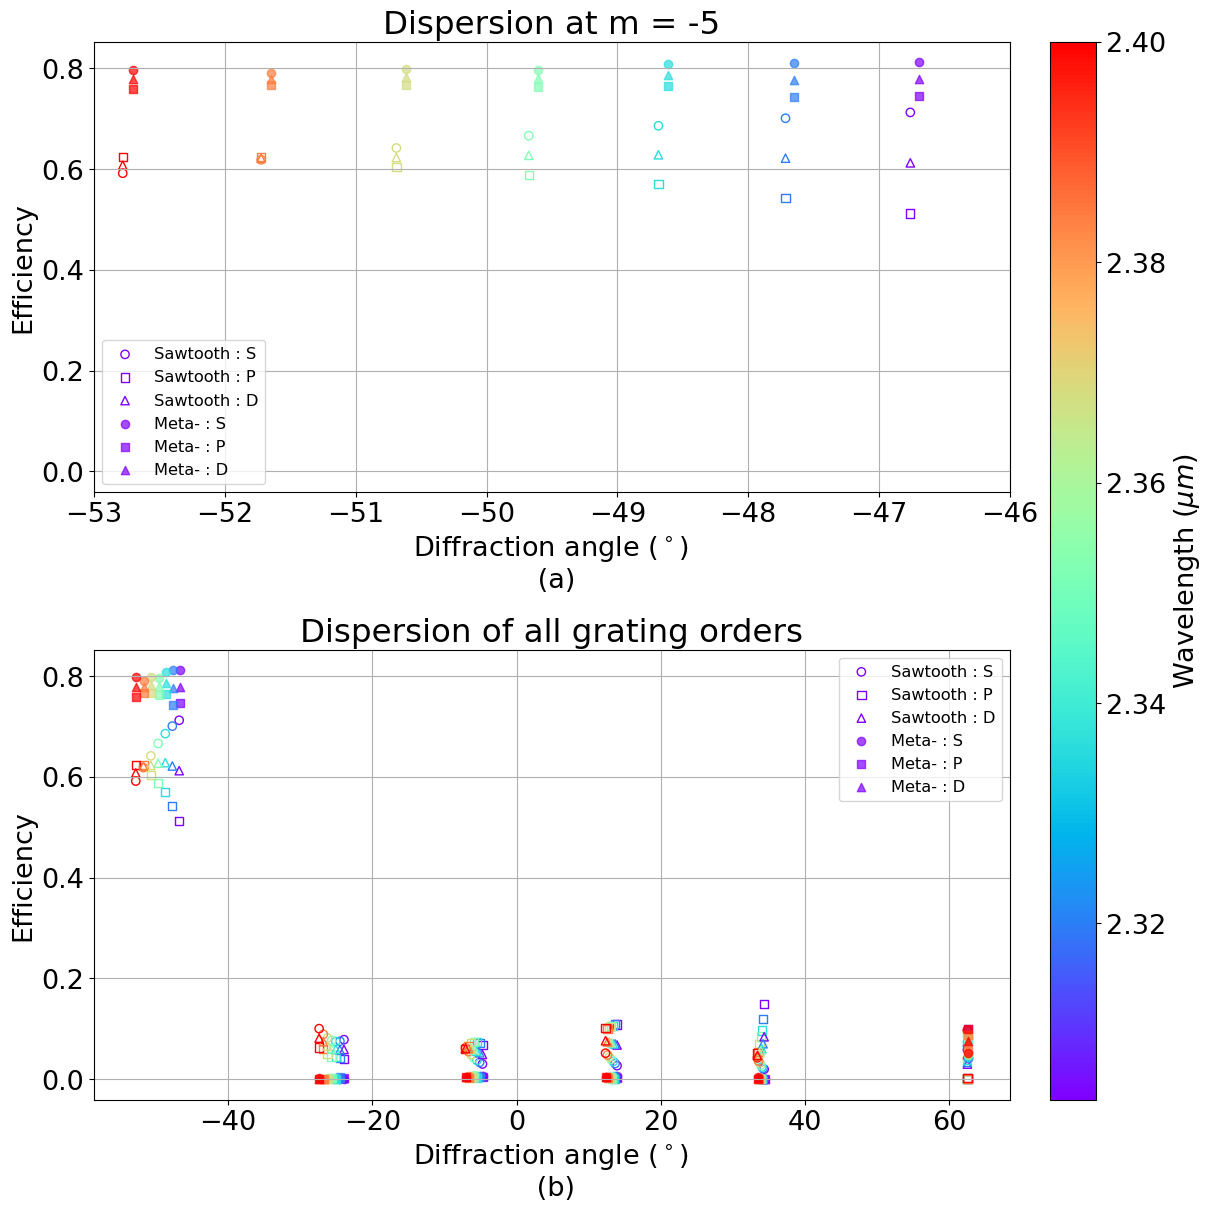

In [47]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

font_size = 26 
symbols = ['o', 's', '^']  # Circle, square, triangle
labels = ['S', 'P', 'D']
polarization_keys = ['S', 'P', 'D']
theta_keys = ['theta_arr_90', 'theta_arr_0', 'theta_arr_45']
efficiency_keys = ['eff_arr_90', 'eff_arr_0', 'eff_arr_45']

# Colormap setup
norm = plt.Normalize(vmin=wavelength_arr.min() * 1e6, vmax=wavelength_arr.max() * 1e6)
cmap = cm.rainbow

# --- Create figure with GridSpec for plots + colorbar ---
fig = plt.figure(figsize=(12, 12), constrained_layout=True)
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[1, 1], figure=fig)

ax1 = fig.add_subplot(gs[1, 0])  # top plot
ax2 = fig.add_subplot(gs[0, 0])  # bottom plot
cax = fig.add_subplot(gs[:, 1])  # colorbar spans both rows

# ------------------------------------------------
# Top subplot: all diffraction orders
# ------------------------------------------------
for i, label in enumerate(labels):
    label_added = False
    for wl in range(len(sawtooth_data['wavelength_range'])):
        wavelength_i_micron = sawtooth_data['wavelength_range'][wl] * 1e6
        if sawtooth_wavelength_filter[wl]:
            theta_deg_i = sawtooth_data[theta_keys[i]][wl]
            efficiencies = sawtooth_data[efficiency_keys[i]][wl].flatten()
            color = cmap(norm(wavelength_i_micron))
            ax1.scatter(theta_deg_i, efficiencies, edgecolor=color, facecolors='none',
                        marker=symbols[i], label=f"Sawtooth : {label}" if not label_added else "", alpha=1)
            label_added = True

for i in range(len(u1_arr_cmaes)):
    polarization_idx = i % 3
    wavelength_idx = i // 3
    wavelength_i_micron = wavelength_arr[wavelength_idx] * 1e6
    u1_value = u1_arr_cmaes[i]
    theta_deg_i = 90 - np.arccos(u1_value) * 180 / np.pi
    efficiencies = eff_array[i].flatten()
    color = cmap(norm(wavelength_i_micron))
    ax1.scatter(theta_deg_i, efficiencies, color=color, marker=symbols[polarization_idx],
                label=f"Meta- : {labels[polarization_idx]}" if wavelength_idx == 0 else "", alpha=0.7)

ax1.set_xlabel(f'Diffraction angle ($^\circ$) \n (b)', fontsize=font_size * 0.75)
ax1.set_ylabel('Efficiency', fontsize=font_size * 0.75)
ax1.set_title(r'Dispersion of all grating orders', fontsize=font_size * 0.9)
ax1.legend(fontsize=font_size * 0.45)
ax1.grid(True)
ax1.tick_params(axis='both', labelsize=font_size * 0.75)

# ------------------------------------------------
# Bottom subplot: zoom into m = -5
# ------------------------------------------------
for i, label in enumerate(labels):
    label_added = False
    for wl in range(len(sawtooth_data['wavelength_range'])):
        wavelength_i_micron = sawtooth_data['wavelength_range'][wl] * 1e6
        if sawtooth_wavelength_filter[wl]:
            theta_deg_i = sawtooth_data[theta_keys[i]][wl]
            efficiencies = sawtooth_data[efficiency_keys[i]][wl].flatten()
            color = cmap(norm(wavelength_i_micron))
            ax2.scatter(theta_deg_i, efficiencies, edgecolor=color, facecolors='none',
                        marker=symbols[i], label=f"Sawtooth : {label}" if not label_added else "", alpha=1)
            label_added = True

for i in range(len(u1_arr_cmaes)):
    polarization_idx = i % 3
    wavelength_idx = i // 3
    wavelength_i_micron = wavelength_arr[wavelength_idx] * 1e6
    u1_value = u1_arr_cmaes[i]
    theta_deg_i = 90 - np.arccos(u1_value) * 180 / np.pi
    efficiencies = eff_array[i].flatten()
    color = cmap(norm(wavelength_i_micron))
    ax2.scatter(theta_deg_i, efficiencies, color=color, marker=symbols[polarization_idx],
                label=f"Meta- : {labels[polarization_idx]}" if wavelength_idx == 0 else "", alpha=0.7)

ax2.set_xlim(-53, -46)
ax2.set_xlabel(f'Diffraction angle ($^\circ$) \n (a)', fontsize=font_size * 0.75)
ax2.set_ylabel('Efficiency', fontsize=font_size * 0.75)
ax2.set_title(r'Dispersion at m = -5', fontsize=font_size * 0.9)
ax2.legend(fontsize=font_size * 0.45)
ax2.grid(True)
ax2.tick_params(axis='both', labelsize=font_size * 0.75)

# ------------------------------------------------
# Shared colorbar
# ------------------------------------------------
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=font_size * 0.75)
cbar.set_label(r'Wavelength ($\mu m$)', fontsize=font_size * 0.75)

# Show the plot
#plt.savefig('eff_dispersion_raw.png', dpi=1000)

save_path = "\\tsclient\PHIGS\paper"
#os.makedirs(save_path, exist_ok=True)  # This ensures the directory exists

#plt.savefig(os.path.join(save_path, 'eff_dispersion_raw.png'), dpi=1000)


In [48]:
########### Phase plots ############


In [49]:
import numpy as np

# Initialize an empty dictionary to store the data
E_dict = {}

wavelength_arr = np.linspace(2.304e-6, 2.400e-6, 7)
polarizations = ['S', 'P']

reflection_arr = []
# Loop over each wavelength and polarization
for i, wavelength_i in enumerate(wavelength_arr):
    for j, polarisation in enumerate(polarizations):
        # Construct filename and FDTD run
        filename = f'simulation_files_lumerical\\2dDesign_field' + f"{polarisation}" + f"{wavelength_i*1e6}" + ".fsp"
        fdtd = lumapi.FDTD(filename, hide=True)

        fdtd.run("FDTD")

        mnmae = 'reflection_grating'
        Ex_mon = fdtd.getdata(mnmae, "Ex")
        Ey_mon = fdtd.getdata(mnmae, "Ey")
        Ez_mon = fdtd.getdata(mnmae, "Ez")

        Tr = fdtd.transmission(mnmae, 1)
        reflection_arr.append(Tr)
        G = fdtd.grating(mnmae)  # power to each order (fraction of transmitted power)
        #print(f"{Tr:0.3f} - {G[0][0]:0.3f}")

        # Extract data
        x_arr = fdtd.getdata(mnmae, "x")
        z_arr = fdtd.getdata(mnmae, "z")

        x = x_arr[:,0]
        z = z_arr[:,0]

        # Select data for the polarization
        Ex = Ex_mon[:,0,:,0]
        Ey = Ey_mon[:,0,:,0]
        Ez = Ez_mon[:,0,:,0]


        Ex_mag = np.ceil(np.round(np.mean(np.abs(Ex)[:, 15]), 2))
        Ey_mag = np.ceil(np.round(np.mean(np.abs(Ey)[:, 0]), 2))
        Ez_mag = np.ceil(np.round(np.mean(np.abs(Ez)[:, 0]), 2))

        weight_Ex_phase = Ex_mag * np.angle(Ex)[:, 15]
        weight_Ey_phase = Ey_mag * np.angle(Ey)[:, 0]
        weight_Ez_phase = Ez_mag * np.angle(Ez)[:, 0]
        

        '''print(f"Ex - {polarisation} : {Ex_mag:0.3f}")
        print(f"Ey - {polarisation} : {Ey_mag:0.3f}")
        print(f"Ez - {polarisation} : {Ez_mag:0.3f}")'''

        # Store the weighted phase data in the dictionary with the appropriate key
        E_dict[f'E_x_{int(wavelength_i*1e9)}_{polarisation.lower()}'] = weight_Ex_phase
        E_dict[f'E_y_{int(wavelength_i*1e9)}_{polarisation.lower()}'] = weight_Ey_phase
        E_dict[f'E_z_{int(wavelength_i*1e9)}_{polarisation.lower()}'] = weight_Ez_phase

        '''# Store the weighted phase data in the dictionary with the appropriate key
        E_dict[f'E_x_{int(wavelength_i*1e9)}_{polarisation.lower()}'] = np.angle(Ex)[:, 15]
        E_dict[f'E_y_{int(wavelength_i*1e9)}_{polarisation.lower()}'] = np.angle(Ey)[:, 0]
        E_dict[f'E_z_{int(wavelength_i*1e9)}_{polarisation.lower()}'] = np.angle(Ez)[:, 0]'''

        print(f"Done: {filename}")

# The dictionary E_dict will now have the keys in the format you want:
# 'E_x_2304_S', 'E_x_2345_S', etc., with the corresponding electric field components.


Done: simulation_files_lumerical\2dDesign_fieldS2.304.fsp
Done: simulation_files_lumerical\2dDesign_fieldP2.304.fsp
Done: simulation_files_lumerical\2dDesign_fieldS2.32.fsp
Done: simulation_files_lumerical\2dDesign_fieldP2.32.fsp
Done: simulation_files_lumerical\2dDesign_fieldS2.336.fsp
Done: simulation_files_lumerical\2dDesign_fieldP2.336.fsp
Done: simulation_files_lumerical\2dDesign_fieldS2.352.fsp
Done: simulation_files_lumerical\2dDesign_fieldP2.352.fsp
Done: simulation_files_lumerical\2dDesign_fieldS2.368.fsp
Done: simulation_files_lumerical\2dDesign_fieldP2.368.fsp
Done: simulation_files_lumerical\2dDesign_fieldS2.384.fsp
Done: simulation_files_lumerical\2dDesign_fieldP2.384.fsp
Done: simulation_files_lumerical\2dDesign_fieldS2.4.fsp
Done: simulation_files_lumerical\2dDesign_fieldP2.4.fsp


In [50]:
# Initialize an empty dictionary to store the data
E_dict_baseline = {}

wavelengths = [2.304e-6, 2.345e-6, 2.386e-6]
wavelengths = np.linspace(2.304e-6, 2.400e-6, 7)
polarizations = [90, 0, 45]

# Loop over each wavelength and polarization
for i, wavelength_i in enumerate(wavelengths):
    for j, polarisation in enumerate(polarizations):
        # Construct filename and FDTD run
        filename = 'baselineResults_SV_SWIR3\swir_3_field' +  f"{polarisation}" + f"{wavelength_i*1e6}" + ".fsp"
        fdtd = lumapi.FDTD(filename, hide=True)

        fdtd.run("FDTD")

        mnmae = 'reflection_grating'
        Ex_mon = fdtd.getdata(mnmae, "Ex")
        Ey_mon = fdtd.getdata(mnmae, "Ey")
        Ez_mon = fdtd.getdata(mnmae, "Ez")

        # Extract data
        x_arr = fdtd.getdata(mnmae, "x")
        z_arr = fdtd.getdata(mnmae, "z")

        x = x_arr[:,0]

        # Select data for the polarization
        Ex = Ex_mon[:,0,:,0]
        Ey = Ey_mon[:,0,:,0]
        Ez = Ez_mon[:,0,:,0]

        weight_Ex_phase = np.mean(2 * np.abs(Ex)[:, 0]) * np.angle(Ex)[:, 0]
        weight_Ey_phase = np.mean(2 * np.abs(Ey)[:, 0]) * np.angle(Ey)[:, 0]
        weight_Ez_phase = np.mean(2 * np.abs(Ez)[:, 0]) * np.angle(Ez)[:, 0]

        weight_Ex_phase = np.angle(Ex)[:, 0]
        weight_Ey_phase = np.angle(Ey)[:, 0]
        weight_Ez_phase = np.angle(Ez)[:, 0]

        # Store the weighted phase data in the dictionary with the appropriate key
        E_dict_baseline[f'E_x_{int(wavelength_i*1e9)}_{polarisation}'] = weight_Ex_phase
        E_dict_baseline[f'E_y_{int(wavelength_i*1e9)}_{polarisation}'] = weight_Ey_phase
        E_dict_baseline[f'E_z_{int(wavelength_i*1e9)}_{polarisation}'] = weight_Ez_phase

        print(filename)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\4004039068.py:12: SyntaxWarning: invalid escape sequence '\s'
  filename = 'baselineResults_SV_SWIR3\swir_3_field' +  f"{polarisation}" + f"{wavelength_i*1e6}" + ".fsp"


baselineResults_SV_SWIR3\swir_3_field902.304.fsp
baselineResults_SV_SWIR3\swir_3_field02.304.fsp
baselineResults_SV_SWIR3\swir_3_field452.304.fsp
baselineResults_SV_SWIR3\swir_3_field902.32.fsp
baselineResults_SV_SWIR3\swir_3_field02.32.fsp
baselineResults_SV_SWIR3\swir_3_field452.32.fsp
baselineResults_SV_SWIR3\swir_3_field902.336.fsp
baselineResults_SV_SWIR3\swir_3_field02.336.fsp
baselineResults_SV_SWIR3\swir_3_field452.336.fsp
baselineResults_SV_SWIR3\swir_3_field902.352.fsp
baselineResults_SV_SWIR3\swir_3_field02.352.fsp
baselineResults_SV_SWIR3\swir_3_field452.352.fsp
baselineResults_SV_SWIR3\swir_3_field902.368.fsp
baselineResults_SV_SWIR3\swir_3_field02.368.fsp
baselineResults_SV_SWIR3\swir_3_field452.368.fsp
baselineResults_SV_SWIR3\swir_3_field902.384.fsp
baselineResults_SV_SWIR3\swir_3_field02.384.fsp
baselineResults_SV_SWIR3\swir_3_field452.384.fsp
baselineResults_SV_SWIR3\swir_3_field902.4.fsp
baselineResults_SV_SWIR3\swir_3_field02.4.fsp
baselineResults_SV_SWIR3\swir_3_fi

In [51]:
wavelengths_nm = wavelength_arr * 1e9
wavelengths_m = wavelength_arr

polarizations = ['s', 'p']

linestyles = {'s': '-', 'p': '--'}

In [52]:
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import matplotlib.colors as mcolors

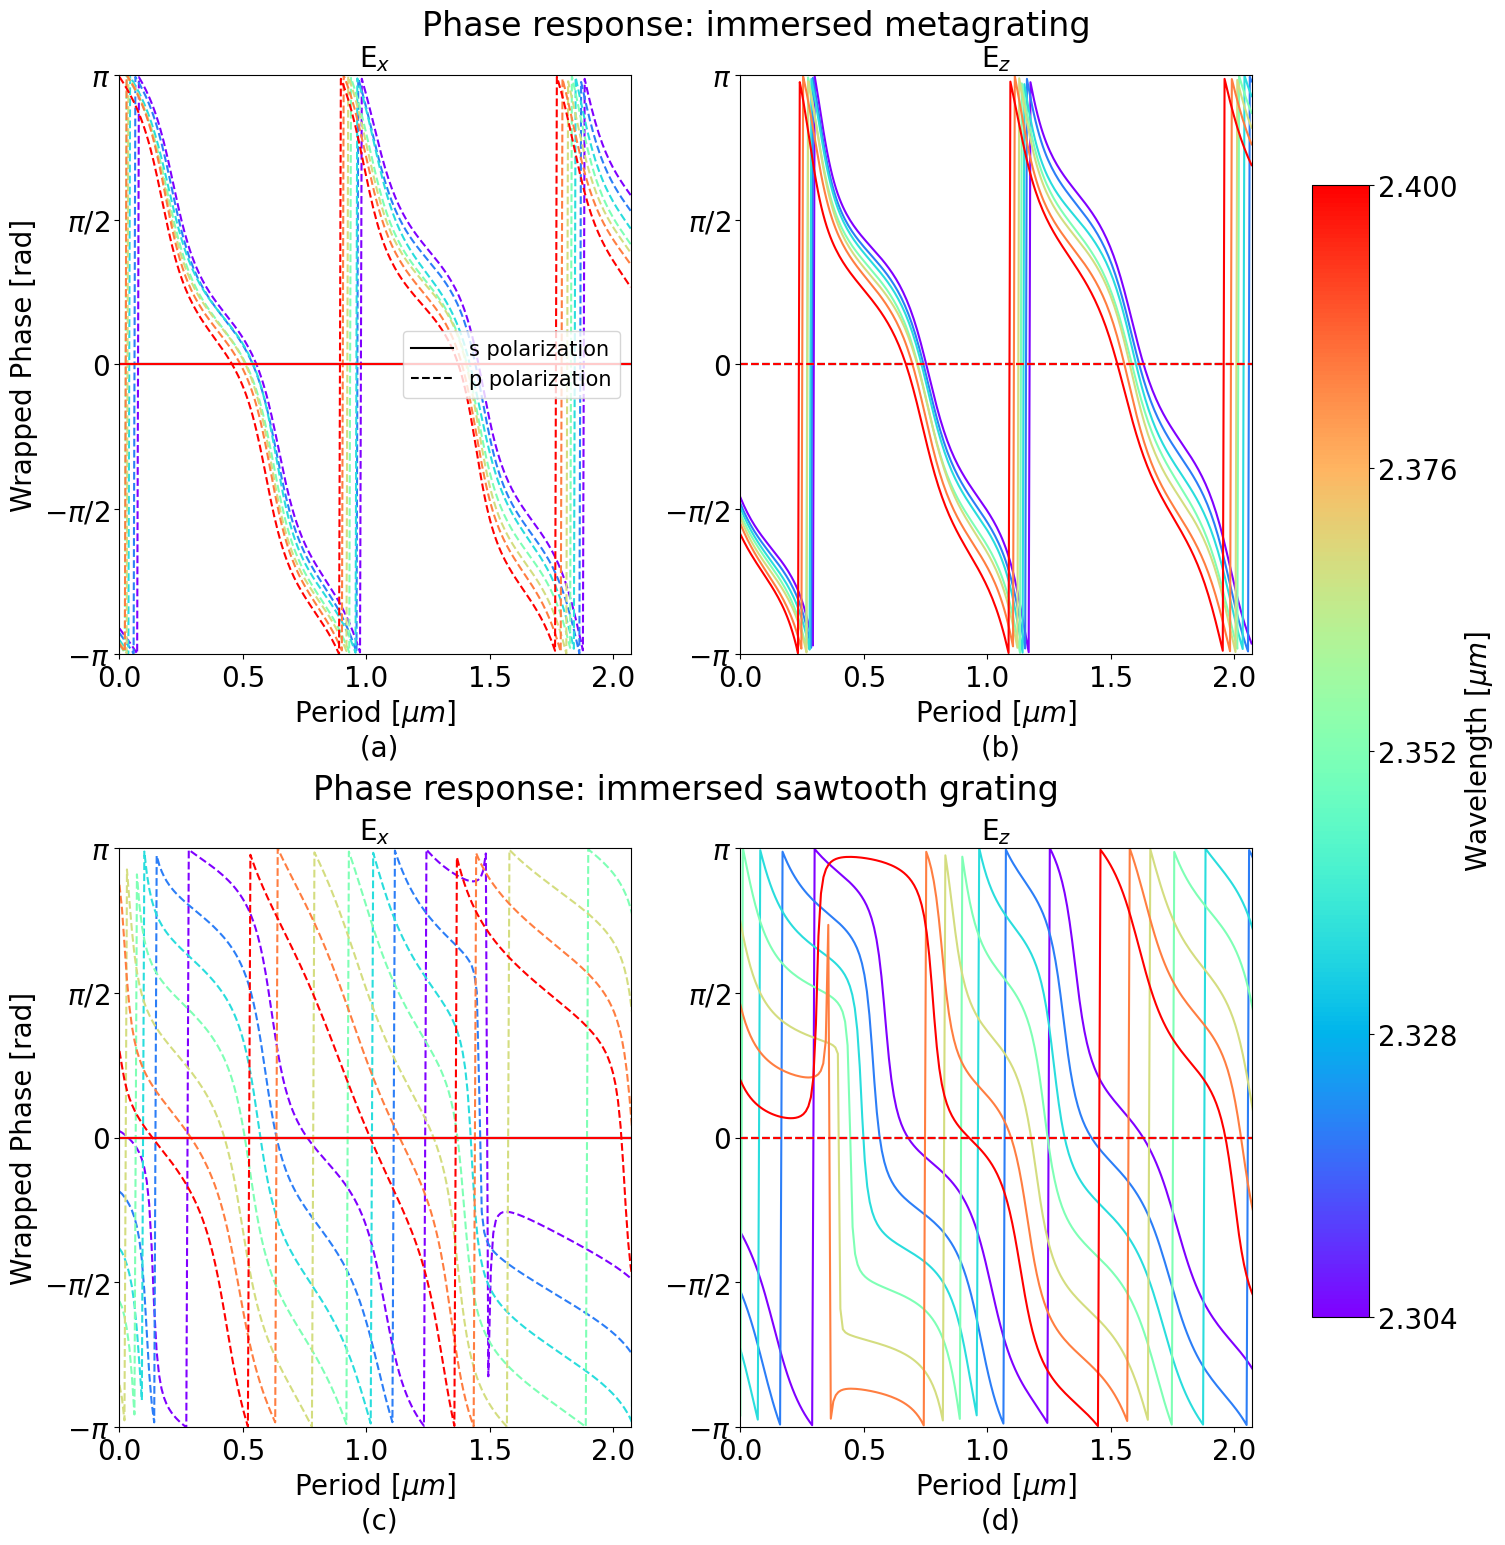

In [53]:
wavelengths_nm = wavelength_arr * 1e9
wavelengths_m = wavelength_arr

polarizations = ['s', 'p']

linestyles = {'s': '-', 'p': '--'}

# Define a central fontsize variable
fontsize = 20

# Set up colormap
cmap = cm.rainbow
norm = mcolors.Normalize(vmin=wavelengths_m.min(), vmax=wavelengths_m.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)

# Create figure with constrained layout
#fig, axs = plt.subplots(2, 2, figsize=(15, 15), constrained_layout=True)
fig = plt.figure(figsize=(15, 15), constrained_layout=True)
gs = fig.add_gridspec(3, 2, height_ratios=[1, 0.06, 1])  # 3 rows, tiny middle row

axs = np.empty((2,2), dtype=object)
axs[0,0] = fig.add_subplot(gs[0,0])
axs[0,1] = fig.add_subplot(gs[0,1])
axs[1,0] = fig.add_subplot(gs[2,0])
axs[1,1] = fig.add_subplot(gs[2,1])

# add a dedicated middle strip for the title
mid = fig.add_subplot(gs[1,:])
mid.axis("off")
mid.text(0.5, 0.5, "Phase response: immersed sawtooth grating",
         ha='center', va='center', fontsize=fontsize*1.2)

fig.suptitle("Phase response: immersed metagrating", fontsize=fontsize*1.2, y=1.02)



# Plot E_x
ax = axs[0,0]
for wl_nm in wavelengths_nm:
    for pol in polarizations:
        key = f'E_x_{int(wl_nm)}_{pol}'
        if key in E_dict:
            y = E_dict[key]
            y_wrapped = (y + np.pi) % (2 * np.pi) - np.pi
            x = np.linspace(0, 2.07, len(y))
            ax.plot(x, y_wrapped,
                    color=cmap(norm(wl_nm * 1e-9)),
                    linestyle=linestyles.get(pol, '-'))
ax.set_title(r'E$_x$', fontsize=fontsize)
ax.set_xlabel(r'Period [$\mu m$]' + f'\n (a)', fontsize=fontsize)
ax.set_ylabel('Wrapped Phase [rad]', fontsize=fontsize)
ax.set_xlim(0, 2.07)
ax.set_ylim(-np.pi, np.pi)
ax.tick_params(labelsize=fontsize)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi / 2))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: {
    -np.pi: r'$-\pi$',
    -np.pi / 2: r'$-{\pi}/{2}$',
    0: r'$0$',
    np.pi / 2: r'${\pi}/{2}$',
    np.pi: r'$\pi$'
}.get(val, f'{val:.2f}')))

# Plot E_z
ax = axs[0,1]
for wl_nm in wavelengths_nm:
    for pol in polarizations:
        key = f'E_z_{int(wl_nm)}_{pol}'
        if key in E_dict:
            y = E_dict[key]
            y_wrapped = (y + np.pi) % (2 * np.pi) - np.pi
            x = np.linspace(0, 2.07, len(y))
            ax.plot(x, y_wrapped,
                    color=cmap(norm(wl_nm * 1e-9)),
                    linestyle=linestyles.get(pol, '-'))
ax.set_title(r'E$_z$', fontsize=fontsize)
ax.set_xlabel(r'Period [$\mu m$]' + f'\n (b)', fontsize=fontsize)
ax.set_xlim(0, 2.07)
ax.set_ylim(-np.pi, np.pi)
ax.tick_params(labelsize=fontsize)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi / 2))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: {
    -np.pi: r'$-\pi$',
    -np.pi / 2: r'$-{\pi}/{2}$',
    0: r'$0$',
    np.pi / 2: r'${\pi}/{2}$',
    np.pi: r'$\pi$'
}.get(val, f'{val:.2f}')))

# Add legend for polarizations
legend_lines = [
    mlines.Line2D([], [], color='black', linestyle='-', label='s polarization'),
    mlines.Line2D([], [], color='black', linestyle='--', label='p polarization'),
]
axs[0,0].legend(handles=legend_lines, loc='center right', fontsize=fontsize * 0.75)

# Add colorbar
#cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.2, pad=0.05)
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.05, pad=0.05, shrink=1.0)
cbar.set_label(r'Wavelength [$\mu m$]', fontsize=fontsize)
tick_locs = np.linspace(wavelengths_m.min(), wavelengths_m.max(), 5)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels([f"{(tick * 1e6):.03f}" for tick in tick_locs])
cbar.ax.tick_params(labelsize=fontsize)


wavelengths_interested = wavelengths #np.array([wavelengths[0], wavelengths[len(wavelengths)//2], wavelengths[-1]])
wavelengths_nm = wavelengths_interested * 1e9
wavelengths_m = wavelengths_interested

# Extend linestyle map to include 'u' with dotted line
linestyles = {'90': '-', '0': '--', '45': ':'}
polarizations = [0, 90]

# Update list of polarizations if 'u' is also present
#polarizations = sorted({k.split('_')[3] for k in E_dict.keys()})

# Recreate colormap and normalization for 'rainbow'
cmap = cm.rainbow
norm = mcolors.Normalize(vmin=wavelengths_m.min(), vmax=wavelengths_m.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)

ax = axs[1,0]
for wl_nm in wavelengths_nm:
    for pol in polarizations:
        key = f'E_x_{int(wl_nm)}_{pol}'
        if key in E_dict_baseline:
            y = E_dict_baseline[key]
            y_wrapped = (y + np.pi) % (2 * np.pi) - np.pi
            x = np.linspace(0, 2 * 2.07, len(y))
            ax.plot(x, y_wrapped,
                    color=cmap(norm(wl_nm * 1e-9)),
                    linestyle=linestyles.get(str(pol), '-'))
ax.set_title(r'E$_x$', fontsize=fontsize)
ax.set_xlabel(r'Period [$\mu m$]' + f'\n (c)', fontsize=fontsize)
ax.set_ylabel('Wrapped Phase [rad]', fontsize=fontsize)
ax.set_xlim(0, 2.07)
ax.set_ylim(-np.pi, np.pi)
ax.tick_params(labelsize=fontsize)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi / 2))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: {
    -np.pi: r'$-\pi$',
    -np.pi / 2: r'$-{\pi}/{2}$',
    0: r'$0$',
    np.pi / 2: r'${\pi}/{2}$',
    np.pi: r'$\pi$'
}.get(val, f'{val:.2f}')))

# Plot E_z
ax = axs[1,1]
for wl_nm in wavelengths_nm:
    for pol in polarizations:
        key = f'E_z_{int(wl_nm)}_{pol}'
        if key in E_dict_baseline:
            y = E_dict_baseline[key]
            y_wrapped = (y + np.pi) % (2 * np.pi) - np.pi
            x = np.linspace(0, 2 * 2.07, len(y))
            ax.plot(x, y_wrapped,
                    color=cmap(norm(wl_nm * 1e-9)),
                    linestyle=linestyles.get(str(pol), '-'))
ax.set_title(r'E$_z$', fontsize=fontsize)
ax.set_xlabel(r'Period [$\mu m$]' + f'\n (d)', fontsize=fontsize)
ax.set_xlim(0, 2.07)
ax.set_ylim(-np.pi, np.pi)
ax.tick_params(labelsize=fontsize)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi / 2))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: {
    -np.pi: r'$-\pi$',
    -np.pi / 2: r'$-{\pi}/{2}$',
    0: r'$0$',
    np.pi / 2: r'${\pi}/{2}$',
    np.pi: r'$\pi$'
}.get(val, f'{val:.2f}')))

# Add legend for polarizations 
legend_lines = [
    Line2D([], [], color='black', linestyle='-', label='s polarization'),
    Line2D([], [], color='black', linestyle='--', label='p polarization'),
]

#plt.savefig(os.path.join(save_path, 'phase_profile_comp.png'), dpi=1000)
#plt.savefig(os.path.join('phase_profile_comp.png'), dpi=1000)


In [54]:
# man tol

In [55]:
wavelength_arr_manTol = np.array([wavelength_arr[0], wavelength_arr[3], wavelength_arr[-1]]) * 1e6

# tolerances
tol_arr = [0.0, 10.0, -10.0, 20.0, -20.0, 25.0, -25.0]

data = []

for wl in wavelength_arr_manTol:
    wl_str = f"{wl:.3f}".rstrip("0").rstrip(".")
    for tol in tol_arr:
        filename = f"simulation_files_lumerical\manTol_2d_Design_fieldU{wl_str}_{tol}.fsp"
        fdtd = lumapi.FDTD(filename, hide=True)
        fdtd.run("FDTD")

        mnmae = 'reflection_grating'
        Ex_mon = fdtd.getdata(mnmae, "Ex")
        Ey_mon = fdtd.getdata(mnmae, "Ey")
        Ez_mon = fdtd.getdata(mnmae, "Ez")

        Tr = fdtd.transmission(mnmae, 1)
        reflection_arr.append(Tr)
        G = fdtd.grating(mnmae)  # power to each order
        eff = -Tr * G[0][0]

        data.append((tol, wl * 1e-6, eff))

        #print(f"{eff:0.3f}")
        print(filename)

data = np.array(data)


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\dhwanilp\AppData\Local\Temp\ipykernel_38416\4090228618.py:11: SyntaxWarning: invalid escape sequence '\m'
  filename = f"simulation_files_lumerical\manTol_2d_Design_fieldU{wl_str}_{tol}.fsp"


simulation_files_lumerical\manTol_2d_Design_fieldU2.304_0.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.304_10.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.304_-10.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.304_20.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.304_-20.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.304_25.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.304_-25.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.352_0.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.352_10.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.352_-10.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.352_20.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.352_-20.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.352_25.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.352_-25.0.fsp
simulation_files_lumerical\manTol_2d_Design_fieldU2.4_0.0.fsp
simulation_files_lumeric

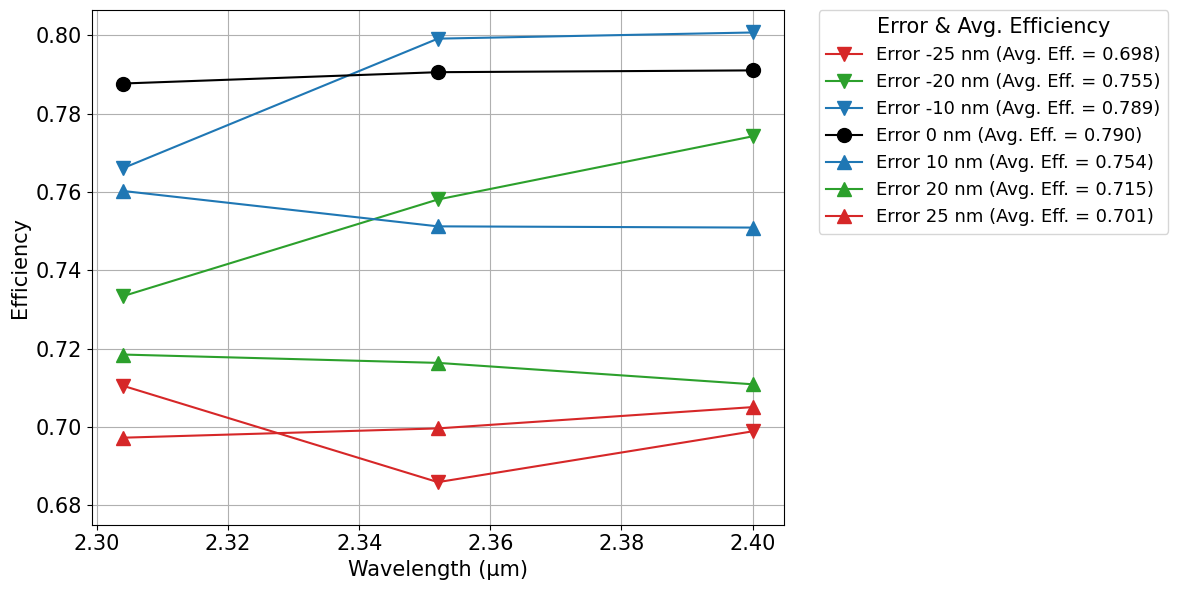

In [57]:
from collections import defaultdict
# Organize data by error value
error_dict = defaultdict(lambda: {"wavelength": [], "eff": []})
for err, wl, eff in data:
    error_dict[err]["wavelength"].append(wl * 1e6)  # µm
    error_dict[err]["eff"].append(eff)

# === Styling ===
font_size = 15

# Assign fixed colors for |error|
color_map = {
    0: "black",     # 0 error
    10: "tab:blue",
    20: "tab:green",
    25: "tab:red"
}

# Marker by sign
def sign_marker(err):
    if err > 0:  return "^"  # up triangle for +error
    if err < 0:  return "v"  # down triangle for -error
    return "o"               # circle for 0

fig, ax = plt.subplots(figsize=(12, 6))

# Plot lines
for err in sorted(error_dict.keys()):
    vals = error_dict[err]
    sorted_pairs = sorted(zip(vals["wavelength"], vals["eff"]))
    wls_sorted, eff_sorted = zip(*sorted_pairs)
    avg_eff = np.mean(eff_sorted)

    color = color_map[abs(err)]
    marker = sign_marker(err)

    ax.plot(
        wls_sorted, eff_sorted,
        marker=marker, color=color,
        ms=10,
        label=f"Error {err:.0f} nm (Avg. Eff. = {avg_eff:.3f})"
    )

ax.set_xlabel("Wavelength (µm)", fontsize=font_size)
ax.set_ylabel("Efficiency", fontsize=font_size)
ax.grid(True)

# Main legend outside the figure
ax.legend(
    title="Error & Avg. Efficiency",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.,
    fontsize=font_size-2,
    title_fontsize=font_size
)

# Tick label font size
ax.tick_params(axis='both', which='major', labelsize=font_size)

plt.ylim(0.675,)
plt.tight_layout()


#plt.savefig(os.path.join(save_path, 'man_tol.png'), dpi=1000)
#plt.savefig(os.path.join('man_tol.png'), dpi=1000)
